In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

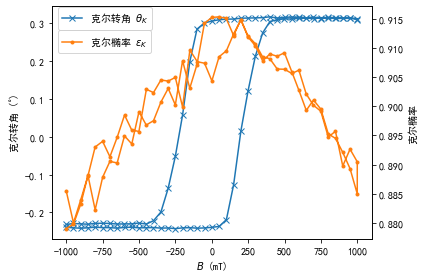

In [39]:
kerr_angle=np.genfromtxt('./strength.txt')[0:82]
kerr_ellip=np.genfromtxt('./strength.txt')[82:]

(fig,ax1) = plt.subplots()
ax2=ax1.twinx()

ax2.plot(kerr_ellip[:,0],kerr_ellip[:,2],'.-',c='C1',label=r'克尔椭率 $\varepsilon_K$')
ax1.plot(kerr_angle[:,0],kerr_angle[:,2],'x-',label=r'克尔转角 $\theta_K$')
ax1.set_xlabel('$B$ (mT)')
ax1.set_ylabel('克尔转角 ($^{\circ}$)')
ax2.set_ylabel('克尔椭率')

ax1.legend(loc=(0.02,0.9))
ax2.legend(loc=(0.02,0.8))

fig.tight_layout()
fig.savefig('pic/scan.pdf')

In [44]:
def center(data):      
    count=0
    an_max=0
    for i in data:
        if i[0] > 590:
            an_max+=i[2]
            count+=1

    an_max=an_max/count

    count=0
    an_min=0
    for i in data:
        if i[0] < -590:
            an_min+=i[2]
            count+=1

    an_min=an_min/count
    # print(an_max,an_min)
    return (an_max-an_min)/2, (an_max+an_min)/2

0.27482497296402875 0.03944878278796629
211.44358306306023
-208.45720911860786


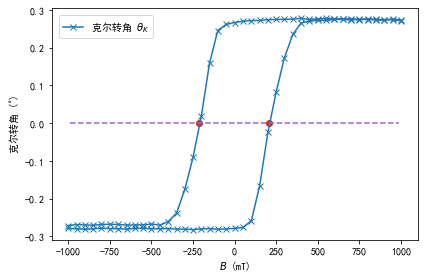

In [51]:
ans, an0 = center(kerr_angle)
kerr_an_sh=kerr_angle[:,2]-an0
print(ans,an0)

(fig,ax) = plt.subplots()
ax.plot(kerr_angle[:,0],kerr_an_sh,'x-',label=r'克尔转角 $\theta_K$')
ax.axhline(y=0,xmin=0.05,xmax=0.95,ls='--',c='C4')
ax.scatter((-213,205),(0,0),c='C3')

ax.set_xlabel('$B$ (mT)')
ax.set_ylabel('克尔转角 ($^{\circ}$)')
ax.legend(loc=(0.02,0.87))

fig.tight_layout()
fig.savefig('pic/zero.pdf')

for i in range(len(kerr_an_sh)-1):
    if kerr_an_sh[i]*kerr_an_sh[i+1] < 0:
        print(kerr_angle[i,0]-kerr_an_sh[i]*(kerr_angle[i,0]-kerr_angle[i+1,0])/(kerr_an_sh[i]-kerr_an_sh[i+1]))



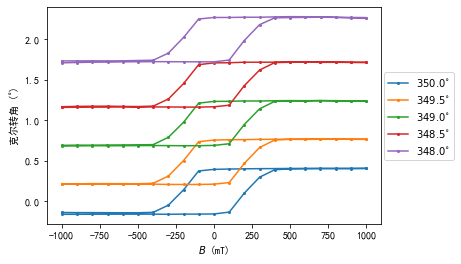

In [32]:
data=np.vsplit(np.genfromtxt('./shift.txt'),5)
label=['$350.0^{\circ}$','$349.5^{\circ}$','$349.0^{\circ}$','$348.5^{\circ}$','$348.0^{\circ}$']
shift = []
(fig,ax) = plt.subplots()
for i in range(5):
    ax.plot(data[i][:,0], data[i][:,2],'.-',markersize=4,label=label[i])
    shift.append(center(data[i]))

shift=np.array(shift)

ax.set_xlabel('$B$ (mT)')
ax.set_ylabel('克尔转角 ($^{\circ}$)')
fig.legend(bbox_to_anchor=(1.08,0.5),loc='center right')

# fig.tight_layout()
fig.savefig('pic/shift.pdf')

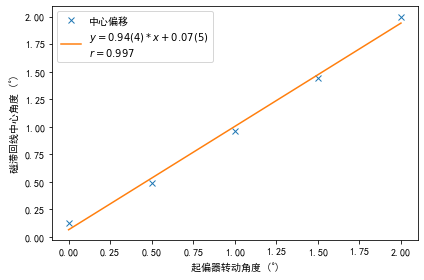

In [26]:
x=np.array([0.,0.5,1.,1.5,2.])
k, cov = np.polyfit(x,shift[:,1], 1,cov=True)

def gen_1Dlabel(para, cov,x='x', d=[5,5,3,3], n=[1,1]):
    f = []
    for i in d:
        f.append('{:.'+str(i)+'f}')
    return (f[0]+'({})*'+ x + ' + '+f[2]+'({})').format(para[0],f[1].format(np.sqrt(cov[0][0]))[-n[0]:], 
                                                        para[1],f[3].format(np.sqrt(cov[1][1]))[-n[1]:])

plt.plot(x,shift[:,1],'x', label='中心偏移')
plt.xlabel('起偏器转动角度 ($^{\circ}$)')
plt.ylabel('磁滞回线中心角度 ($^{\circ}$)')
plt.plot(x,k[0]*x+k[1],label='$y='+gen_1Dlabel(k,cov,d=[2,2,2,2],n=[1,1])+'$'+'\n$r=0.997$')

plt.legend()
plt.tight_layout()
plt.savefig('pic/shiftfit.pdf')